## **Logistic Regression**

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).

For Example: spam detection for emails, predicting if a customer will default in a loan, etc.

By [Muhammad Huzaifa Shahbaz](https://www.linkedin.com/in/mhuzaifadev)

## **Importing libraries**

We will import Pandas as *pd*, train_test_split from sklearn.model_selection, confusion_matrix & accuracy_score from sklearn.metrics and Logistic Regression from sklearn.linear_model.   

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## **DataFraming**

Read .csv data into a Dataframe 

In [2]:
creditData = pd.read_csv("bank_2.csv")
print(creditData.head())
print(creditData.describe())
print(creditData.corr())

   age  job  marital  education  default  balance  housing  loan  contact  \
0   30   77       17         21       31     1787       41    51       61   
1   33   78       17         22       31     4789       42    52       61   
2   35   79       16         23       31     1350       42    51       61   
3   30   79       17         23       31     1476       42    52       63   
4   59   80       17         22       31        0       42    51       63   

   day  month  duration  campaign  pdays  previous  poutcome  color  
0   19     10        79         1      1         0        74     91  
1   11      5       220         1    339         4        71     91  
2   16      4       185         1    330         1        71     91  
3    3      6       199         4      1         0        74     91  
4    5      5       226         1      1         0        74     91  
               age          job      marital    education      default  \
count  4521.000000  4521.000000  4521.00000

## **Features Extraction**

Extracting features and splitting data into test and train.

In [3]:
features = creditData[["age","job","marital","education","default","balance","housing","loan","contact","pdays","previous","poutcome"]]
target = creditData[["color"]]

feature_train, feature_test, target_train, target_test = train_test_split(features,target)

## **Training the Model**

We are using Logistic regression model as imported from sklearn library and then it's being trained on feature_train and target_train

In [4]:
model = LogisticRegression()
model.fit = model.fit(feature_train, target_train)
predictions = model.fit.predict(feature_test)

C:\Python38\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [5]:
# Creating a function to report confusion metrics
def confusion_metrics (conf_matrix):
# save confusion matrix and slice into four pieces
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy: {round(conf_accuracy,2)}') 
    print(f'Mis-Classification: {round(conf_misclassification,2)}') 
    print(f'Sensitivity: {round(conf_sensitivity,2)}') 
    print(f'Specificity: {round(conf_specificity,2)}') 
    print(f'Precision: {round(conf_precision,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')

    fpr, tpr, thresholds = metrics.roc_curve(target_test, predictions,pos_label=91)

    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.rcParams['font.size'] = 12
    plt.title('ROC curve for bank classifier')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.grid(True)

## **Printing an Error Matrix and Accuracy Score**

[[997   2]
 [132   0]]
0.8815207780725022
True Positives: 0
True Negatives: 997
False Positives: 2
False Negatives: 132
--------------------------------------------------
Accuracy: 0.88
Mis-Classification: 0.12
Sensitivity: 0.0
Specificity: 1.0
Precision: 1.0
f_1 Score: 0.0
None


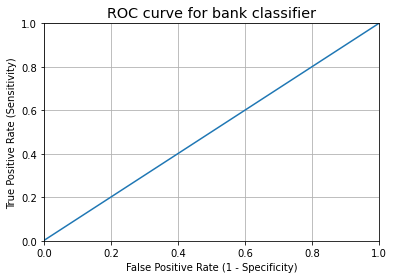

In [6]:
print(confusion_matrix(target_test,predictions))
print(accuracy_score(target_test,predictions))
print(confusion_metrics(confusion_matrix(target_test,predictions)))